# Data Acquisition and Integration through Python Image Processing Techniques
### This notebook measures the displacements of a sequence of images recorded sample stretching process and also combines the images and the data to create a dynamic video.
## Displacement Measurement
### Using Canny edge detector to mark the edge of each image and measure the displacement. Various methods are employed to identify the corresponded data and images.
## Acknowledgement
### This tutorial was written by Qiwei Yin(qmy5063@psu.edu) at PSU and USTC.
## Version
### cv2 - Version: 4.10.0; 
openpyed - Version: 3.1; 2
matplotled - Version: 3.; .4
lled - Version: 4.; 6.4alled - Version: 1; .3.0
mtalled - Version: 1.5.3

In [211]:
import importlib

# List of packages to check along with their import names
packages = {
    "pandas": "pd",
    "numpy": "np",
    "cv2": "cv2",
    "os": "os",
    "openpyxl": "openpyxl",
    "matplotlib": "matplotlib",
    "tqdm": "tqdm",
    "PIL": "PIL",
    "mrcfile": "mrcfile"
}

# Check each package for installation and version
for package, module_name in packages.items():
    try:
        lib = importlib.import_module(module_name)
        version = getattr(lib, '__version__', 'No version info available')
        print(f"{package} is installed - Version: {version}")
    except ImportError:
        print(f"{package} is not installed")

pandas is not installed
numpy is not installed
cv2 is installed - Version: 4.10.0
os is installed - Version: No version info available
openpyxl is installed - Version: 3.1.2
matplotlib is installed - Version: 3.8.4
tqdm is installed - Version: 4.66.4
PIL is installed - Version: 10.3.0
mrcfile is installed - Version: 1.5.3


# mp4 convert to tif
## If you don't need to, you can skip this part by tapping the left side of this markdown code.

In [206]:
import cv2
from PIL import Image
import os

# Set parameters
video_path = "D:/graphene_video.mp4" # Replace with your video file path
output_folder = "D:/output_frames"  # Folder to save frames
start_time = 0  # Start time in seconds (00:00:00)
end_time = 8 * 60 + 52  # End time in seconds (00:08:52)
fps = 0.5  # Frames per second

# Create the output directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Calculate frame interval based on fps
    frame_interval = int(cap.get(cv2.CAP_PROP_FPS) / fps)

    # Calculate starting and ending frames
    start_frame = int(start_time * cap.get(cv2.CAP_PROP_FPS))
    end_frame = int(end_time * cap.get(cv2.CAP_PROP_FPS))

    # Set the initial frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    current_frame = start_frame
    image_count = 0

    # Loop through frames and save at intervals
    while current_frame <= end_frame:
        # Set position to the current frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)

        # Read the frame
        ret, frame = cap.read()
        if not ret:
            break  # Break the loop if no frame is returned

        # Convert the frame to RGB format
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Convert the frame to a PIL image and save as TIFF
        img = Image.fromarray(frame_rgb)
        output_filename = os.path.join(output_folder, f"frame_{image_count:04d}.tif")
        img.save(output_filename, format="TIFF")
        print(f"Saved {output_filename}")

        # Move to the next frame based on interval
        current_frame += frame_interval
        image_count += 1

    cap.release()
    print("Conversion complete!")



Saved D:/output_frames\frame_0000.tif
Saved D:/output_frames\frame_0001.tif
Saved D:/output_frames\frame_0002.tif
Saved D:/output_frames\frame_0003.tif
Saved D:/output_frames\frame_0004.tif
Saved D:/output_frames\frame_0005.tif
Saved D:/output_frames\frame_0006.tif
Saved D:/output_frames\frame_0007.tif
Saved D:/output_frames\frame_0008.tif
Saved D:/output_frames\frame_0009.tif
Saved D:/output_frames\frame_0010.tif
Saved D:/output_frames\frame_0011.tif
Saved D:/output_frames\frame_0012.tif
Saved D:/output_frames\frame_0013.tif
Saved D:/output_frames\frame_0014.tif
Saved D:/output_frames\frame_0015.tif
Saved D:/output_frames\frame_0016.tif
Saved D:/output_frames\frame_0017.tif
Saved D:/output_frames\frame_0018.tif
Saved D:/output_frames\frame_0019.tif
Saved D:/output_frames\frame_0020.tif
Saved D:/output_frames\frame_0021.tif
Saved D:/output_frames\frame_0022.tif
Saved D:/output_frames\frame_0023.tif
Saved D:/output_frames\frame_0024.tif
Saved D:/output_frames\frame_0025.tif
Saved D:/out

# mrc convert to tif
## Attention! If you don't need to convert mrc, you can skip this part by tapping the left side of this markdown code to fold it.
### For converting, you can make mrc_filename = your file path, and output_dir = your output file path.

In [ ]:
import mrcfile
import numpy as np
from PIL import Image
import os

def mrc_to_tif(mrc_filename, output_dir):
    """
    Converts each frame in an MRC file to TIF images and saves them in the specified directory.
    """
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    with mrcfile.open(mrc_filename) as mrc:
        data = mrc.data
        num_frames = data.shape[0]
        
        for i in range(num_frames):
            frame = data[i]
            
            # Convert numpy array to PIL image
            img = Image.fromarray(frame)
            
            # Ensure the image is in a mode that TIF supports
            if img.mode != 'L':  # 'L' is for grayscale images
                img = img.convert('L')
            
            # Save image as TIF
            tif_filename = os.path.join(output_dir, f"frame_{i:04d}.tif")
            img.save(tif_filename)
            print(f"Saved {tif_filename}")

# MRC file path and output directory
mrc_filename = "D:/output1.mrc"
output_dir = "D:/tif_output"

# Convert and save images
mrc_to_tif(mrc_filename, output_dir)

# jpg convert to tif
## If you don't need to convert, you can skip this part by tapping the left side of this markdown code to fold it.
### For converting, you can make input_folder = your file path, and output_folder = your output file path.

In [ ]:
import os
from PIL import Image

# Set the folder paths
input_folder = "D:/1/output_images"
output_folder = "D:/1/output_tif_images"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Open and convert the image
        img = Image.open(os.path.join(input_folder, filename))
        # Construct the new TIF filename
        new_filename = os.path.splitext(filename)[0] + ".tif"
        # Save the image in TIF format
        img.save(os.path.join(output_folder, new_filename))

print("All JPG files have been successfully converted to TIF format!")

# txt convert to xlsx
## The xlsx format file is really convenient for data processing. Strongly recommend you to do this step by yourself or by this code.
### If you already have a data file in xlsx format, you can skip this part by tapping the left side of this markdown code. 

In [ ]:
import pandas as pd

# Define file paths
txt_file_path = 'D:/1/output.txt'
xlsx_file_path = 'D:/1/output.xlsx'

# Read the txt file, assuming space-separated or comma-separated values
try:
    # Attempt to read as a space-separated file; adjust delimiter if needed
    data = pd.read_csv(txt_file_path, delimiter='\t')  # Change delimiter if necessary
    
    # Save the data to an Excel file
    data.to_excel(xlsx_file_path, index=False)
    print(f"Conversion complete! Excel file saved at: {xlsx_file_path}")

except Exception as e:
    print(f"An error occurred: {e}")

# The main part of the code starts here...

In [55]:
import pandas as pd
import numpy as np
import cv2
import os
from openpyxl import Workbook
import matplotlib.pyplot as plt
from tqdm import tqdm

# Image properties, imports
### In this part, you need to write down the ratio of pixel to nm, which insures this code can get the exact displacement of the sample.
### The top_edge_detection_percentage means：at what percentage from the top to the bottom of the image do you want to detect the edge.
### The bottom_edge_detection_percentage means：at what percentage from the bottom to the top of the image do you want to detect the edge.?"

In [57]:
# Input for pixel-to-nm conversion ratio and edge detection percentages
pixel_to_nm_ratio = 0.7
top_edge_detection_percentage = 50
bottom_edge_detection_percentage = 50

In [59]:
# Process images and calculate total displacement
def process_images_and_calculate_displacement(image_folder):
    valid_extensions = (".tif", ".tiff")
    images = sorted([img for img in os.listdir(image_folder) if img.endswith(valid_extensions)])
    
    displacement_photo_values = []
    first_image_top_distance = None
    first_image_bottom_distance = None
    edge_images = []  # Store edge-detected images for later display
    
    # Allow the user to select specific images to display
    selected_indices = input("Enter the indices of images to display, separated by commas (e.g., 0, 5, 10): ")
    selected_indices = [int(idx.strip()) for idx in selected_indices.split(",")]
    
    for idx, img_name in enumerate(tqdm(images, desc="Processing Images")):
        img_path = os.path.join(image_folder, img_name)
        img = cv2.imread(img_path, 0)
        
        # Binarization and edge detection
        _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
        edges = cv2.Canny(binary, 50, 150)
        
        # Top edge detection (percentage from the top)
        top_row_limit = int(edges.shape[0] * top_edge_detection_percentage / 100)
        top_section = edges[:top_row_limit, :]
        top_non_zero_points = np.argwhere(top_section > 0)
        if len(top_non_zero_points) == 0:
            raise Exception(f"No edge detected in top section of image: {img_name}")
        top_avg_distance = np.mean(top_non_zero_points[:, 0])
        
        # Bottom edge detection (percentage from the bottom)
        bottom_row_limit = int(edges.shape[0] * bottom_edge_detection_percentage / 100)
        bottom_section = edges[-bottom_row_limit:, :]
        bottom_non_zero_points = np.argwhere(bottom_section > 0)
        if len(bottom_non_zero_points) == 0:
            raise Exception(f"No edge detected in bottom section of image: {img_name}")
        bottom_avg_distance = bottom_row_limit - np.mean(bottom_non_zero_points[:, 0])

        # Store distances for the first image as a reference
        if first_image_top_distance is None:
            first_image_top_distance = top_avg_distance
        if first_image_bottom_distance is None:
            first_image_bottom_distance = bottom_avg_distance

        # Calculate displacements for top and bottom
        top_displacement = (first_image_top_distance - top_avg_distance) * pixel_to_nm_ratio
        bottom_displacement = (first_image_bottom_distance - bottom_avg_distance) * pixel_to_nm_ratio
        
        # Total displacement = top displacement - bottom displacement
        total_displacement = top_displacement - bottom_displacement
        displacement_photo_values.append((img_name, total_displacement))
        edge_images.append((img_name, top_section, bottom_section))  # Store edge-detected sections
    
    # Display selected original and edge-detected images
    fig, axes = plt.subplots(len(selected_indices), 3, figsize=(15, 5 * len(selected_indices)))
    fig.suptitle("Selected Original and Edge-detected Images (Top and Bottom Sections)", fontsize=16)
    
    for i, idx in enumerate(selected_indices):
        img_name = images[idx]
        original_img = cv2.imread(os.path.join(image_folder, img_name), 0)
        top_edge_img, bottom_edge_img = edge_images[idx][1], edge_images[idx][2]
        
        axes[i, 0].imshow(original_img, cmap='gray')
        axes[i, 0].set_title(f"Original Image: {img_name}")
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(top_edge_img, cmap='gray')
        axes[i, 1].set_title(f"Top Edge-detected: {img_name}")
        axes[i, 1].axis('off')
        
        axes[i, 2].imshow(bottom_edge_img, cmap='gray')
        axes[i, 2].set_title(f"Bottom Edge-detected: {img_name}")
        axes[i, 2].axis('off')
    
    plt.show()
    
    return displacement_photo_values, images

# Save the displacement(photo) data to an Excel file
def save_displacement_photo_to_excel(displacement_photo_values, output_file):
    wb = Workbook()
    ws = wb.active
    ws.append(["Image Name", "Displacement(photo) (nm)"])
    
    for img_name, displacement_photo in displacement_photo_values:
        ws.append([img_name, displacement_photo])
    
    wb.save(output_file)
    print(f"Displacement(photo) data saved to {output_file}")

# Simple visualizations
### Input the path of your image file. The images should be in tif/tiff format. And you can choose some images to check the outcomes. PLease use comma to divide each image number. The comma should be in English.
### Please pay attention that you can only change the value name of image_folder. 

Enter the indices of images to display, separated by commas (e.g., 0, 5, 10):  0,1218,1314


Processing Images: 100%|██████████████████████████████████████████████████████████| 1683/1683 [00:09<00:00, 168.59it/s]


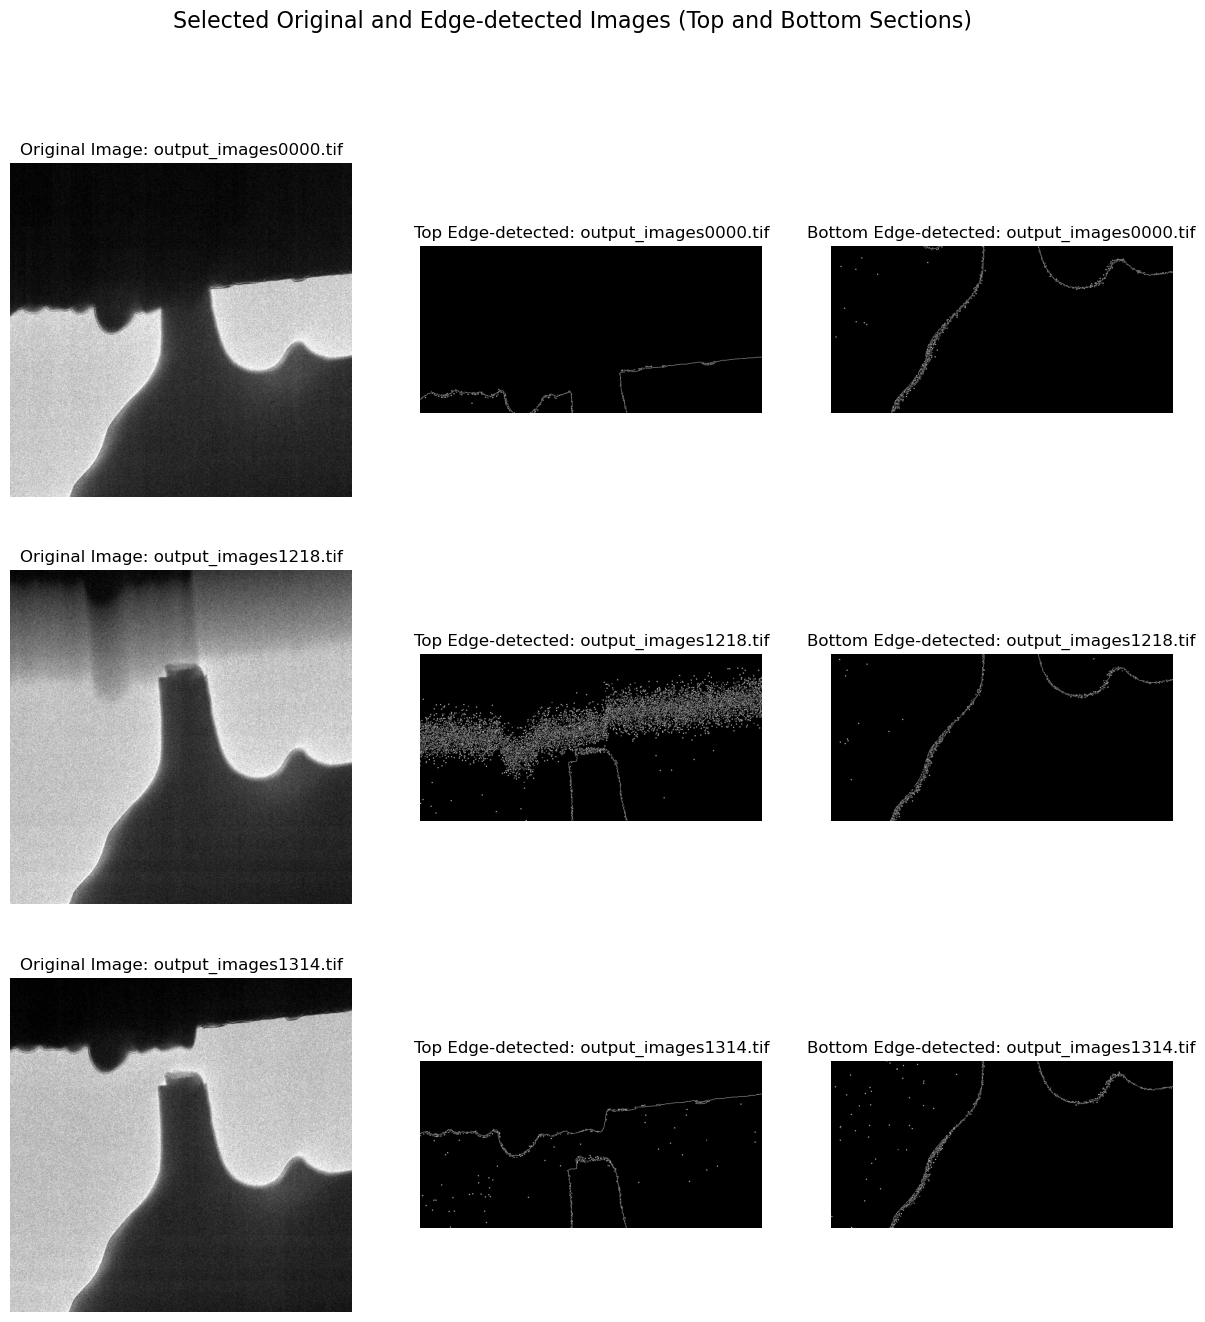

Displacement(photo) data saved to D:/1\photo_data.xlsx


In [61]:
# Step 1: Process images and calculate displacement(photo)
image_folder = "D:/1/output_tif_images"
displacement_photo_values, images = process_images_and_calculate_displacement(image_folder)

# Save the displacement results to Excel
output_file = os.path.join(os.path.dirname(image_folder), "photo_data.xlsx")
save_displacement_photo_to_excel(displacement_photo_values, output_file)

# Data Input
### In this part, you need to input the data path. Make sure the data file format is xlsx. If not, please convert it in the front box. 
### After you input the data, first 10 rows of the data will be printed at below. You can check the data by this way.

In [ ]:
# Step 2: Process the Excel file
file_path = "D:/2/experiment_data.xlsx"
df = pd.read_excel(file_path)

# Display column indices and names and print the first 10 rows
print("Column indices and names:")
for i, col_name in enumerate(df.columns):
    print(f"Column {i}: {col_name}")

print("\nFirst 10 rows of the data:")
print(df.head(10))

# Match relevant physical quantities
### Different files have different columns, but the physical quantities we need to generate video are the same. 
### We need to tell the corresponding number of each physical quantity.

In [65]:
# Input column indices for displacement, time, and load
displacement_col_idx = 0
time_col_idx = 2
load_col_idx = 1  # Assuming load data is present

# Averaging
### The points in the file are always numerous, and we need to average all the points to make them clear enough for us to analyze. The scale of averaging is decided by yourself. Try to choose a scale to make the data appropriate.

In [ ]:
# Step 3: Group data by averaging
group_size = 5
averaged_df = df.groupby(np.arange(len(df)) // group_size).mean()

In [ ]:
# Add columns for stress and strain (initially empty)
averaged_df["stress (μN/nm²)"] = np.nan
averaged_df["strain"] = np.nan

# Save to Excel
average_points_file = os.path.join(os.path.dirname(file_path), "average_points.xlsx")
averaged_df.to_excel(average_points_file, index=False)
print(f"Averaged points file saved as: {average_points_file}")

# Frame rate entering
### The frame rate of each experiment is already known. Please enter it.

In [71]:
# Step 4: Calculate which images correspond to each point based on frame rate
frame_rate = 10

# Matching
### By calculating the displacement of files derived from the images and the experiment, we can match the maximum displacement change, which is a good way to make each point match the right image. 
### At below, you can check the images around the target image( the maximum displacement change ), to see if you find a right one.

Target time: 18.632858
Target image: output_images1218.tif


Displaying surrounding images: 100%|██████████████████████████████████████████████████| 11/11 [00:00<00:00, 192.97it/s]


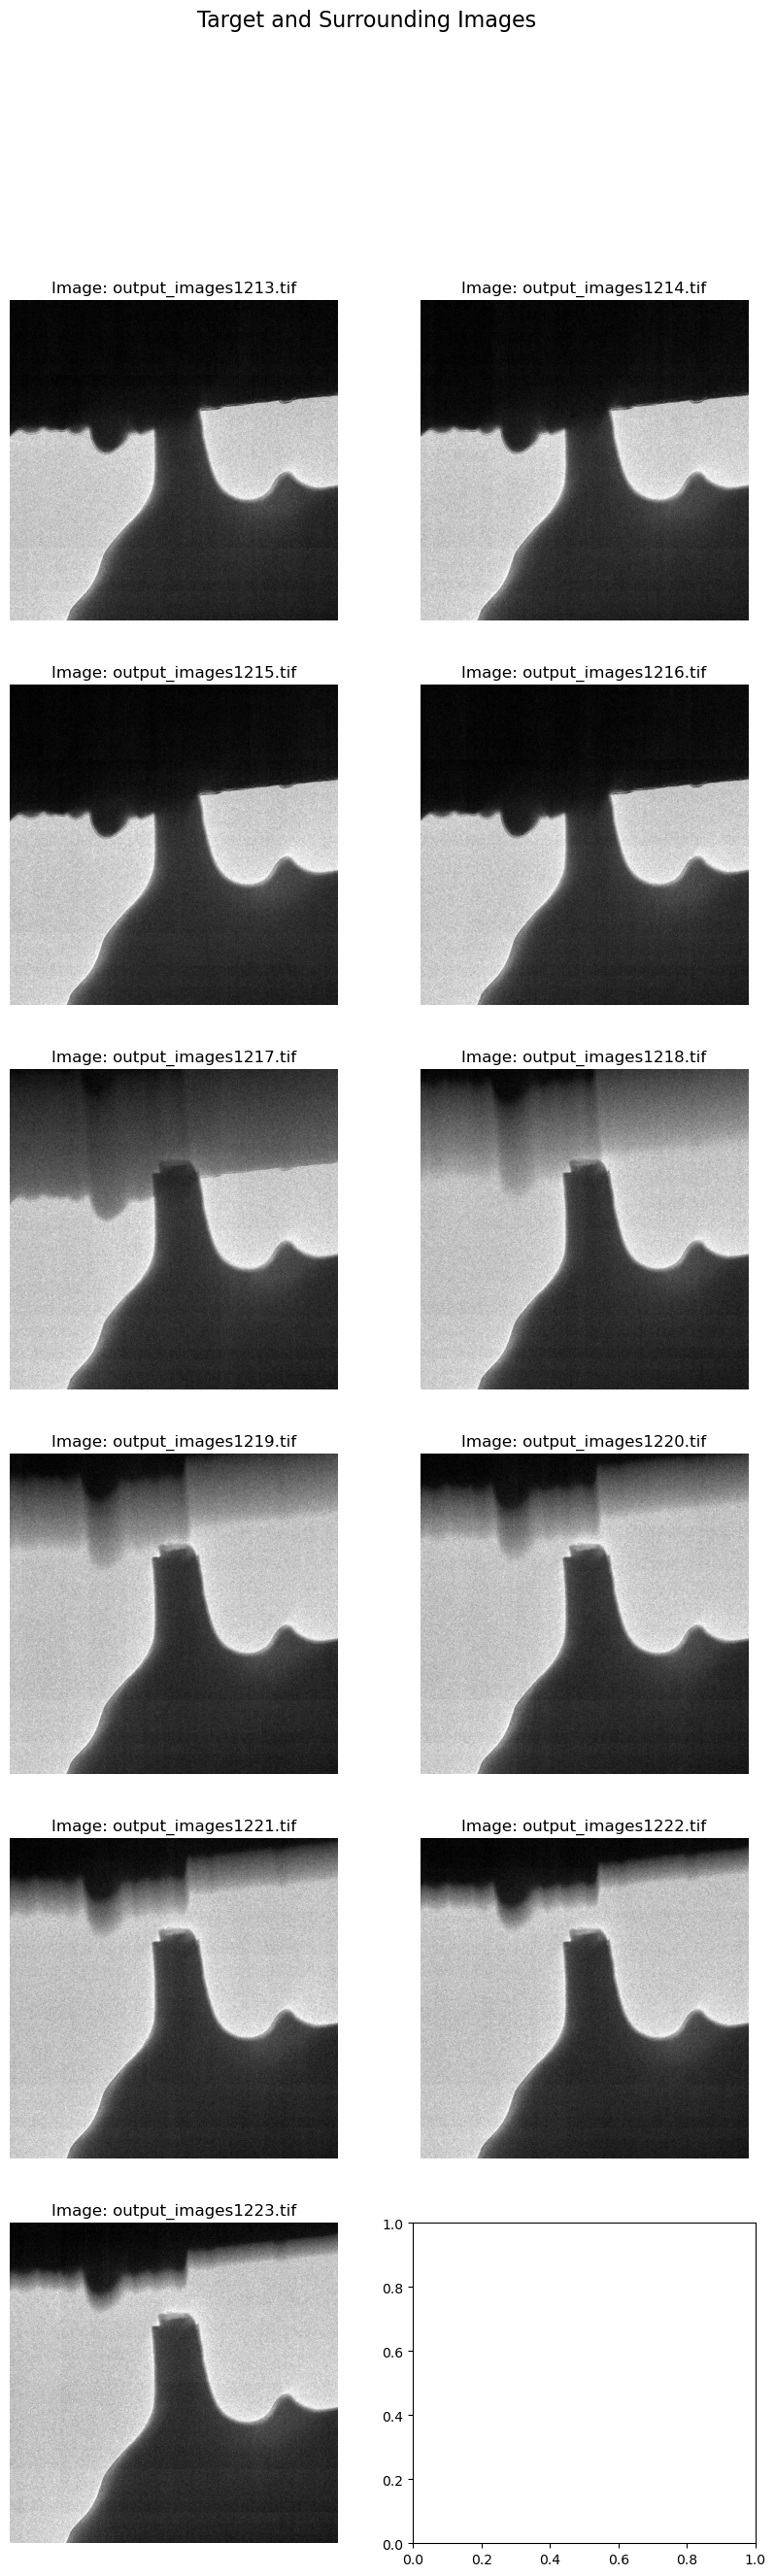

Matching images for each time point: 100%|█████████████████████████████████████| 1661/1661 [00:00<00:00, 830659.23it/s]


In [77]:
# Calculate displacement change in dataframe and find maximum displacement change row
df['Displacement Change'] = df.iloc[:, displacement_col_idx].diff().fillna(0).abs()
max_disp_change_row_df = df['Displacement Change'].idxmax()
target_time = df.iloc[max_disp_change_row_df, time_col_idx]
print(f"Target time: {target_time}")

# Calculate the displacement change in image-based data and find the target image
displacement_changes_photo = [0] + [abs(j - i) for i, j in zip(
    [v[1] for v in displacement_photo_values[:-1]],
    [v[1] for v in displacement_photo_values[1:]]
)]
target_image_idx = displacement_changes_photo.index(max(displacement_changes_photo))
target_image_name = displacement_photo_values[target_image_idx][0]
print(f"Target image: {target_image_name}")

# Display the target image and its surrounding images with progress bar
surrounding_indices = range(max(0, target_image_idx - 5), min(len(images), target_image_idx + 6))
num_surrounding = len(surrounding_indices)
fig, axes = plt.subplots((num_surrounding + 1) // 2, 2, figsize=(10, 5 * ((num_surrounding + 1) // 2)))
fig.suptitle("Target and Surrounding Images", fontsize=16)

# Use tqdm to show progress and only display images in surrounding_indices
for i, idx in tqdm(enumerate(surrounding_indices), desc="Displaying surrounding images", total=len(surrounding_indices)):
    img_name = images[idx]
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path, 0)
    
    ax = axes[i // 2, i % 2]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Image: {img_name}")
    ax.axis('off')

# Show the plot only if there are images to display
plt.show()

# Calculate the image index for the first and last points
time_values = averaged_df.iloc[:, time_col_idx]
first_point_time = time_values.iloc[0]
first_image_idx = target_image_idx - int((target_time - first_point_time) * frame_rate)

last_point_time = time_values.iloc[-1]
last_image_idx = target_image_idx + int((last_point_time - target_time) * frame_rate)

# Only show images between first_image_idx and last_image_idx
start_image_idx = max(0, first_image_idx)
end_image_idx = min(len(displacement_photo_values) - 1, last_image_idx)

# Find the matching images for each point with progress bar
matched_images = []
for i, time_value in tqdm(enumerate(time_values), desc="Matching images for each time point", total=len(time_values)):
    frame_idx = first_image_idx + int((time_value - first_point_time) * frame_rate)
    img_idx = max(0, min(len(displacement_photo_values) - 1, frame_idx))
    matched_image_name = displacement_photo_values[img_idx][0]
    matched_images.append(matched_image_name)


In [79]:
# Step 6: Match displacement(photo) to the images
matched_displacement_photos = []
for img_name in matched_images:
    displacement_photo_value = next((x[1] for x in displacement_photo_values if x[0] == img_name), None)
    matched_displacement_photos.append(displacement_photo_value)

# Add the matched displacement(photo) values to the averaged_df
averaged_df["Matched Image"] = matched_images
averaged_df["Displacement(photo) (nm)"] = matched_displacement_photos

In [81]:
# Step 7: Re-print column names and first 10 rows before chart generation
print("\nColumns in averaged_df and first 10 rows:")
print(averaged_df.head(10))
for i, col_name in enumerate(averaged_df.columns):
    print(f"Column {i}: {col_name}")


Columns in averaged_df and first 10 rows:
   Displacement(nm)  Load (μN)  Time (s)  Displacement Change  \
0         -0.383658  72.773452  0.010010             4.431093   
1          5.326310  71.496967  0.035034             6.067342   
2          5.274597  71.562300  0.060058             6.527947   
3          0.181088  72.887235  0.085082            11.697828   
4          4.411506  71.998628  0.110106             6.878393   
5         -1.746383  73.570151  0.135130             3.336532   
6         -0.849352  73.510829  0.160154            11.379388   
7         -2.372754  74.058920  0.185178             6.386030   
8         17.656202  69.259256  0.210202             9.335541   
9         13.045405  70.184646  0.235226             9.171938   

   stress (μN/nm²)  strain          Matched Image  Displacement(photo) (nm)  
0              NaN     NaN  output_images1032.tif                  3.384685  
1              NaN     NaN  output_images1032.tif                  3.384685  
2      

# Video generation
### The columns of the averaging data have been list above. 
### Choose the number to decide how many charts you want to generate, and input the coordinate axis names( choose the numbers of the columns ) .
### If you want to choose the column containing stress or strain, please enter the value of corresponding physical property. After that, the stress or strain column will be filled in, and you can check the data at below. Then the video can be generated.

In [83]:
# Generate charts for video
num_charts = 2
x_columns = [2,4]
y_columns = [1,3]
sample_area = 100  # Placeholder for stress calculation
L0 = 100  # Placeholder for strain calculation

In [140]:
# Collect X and Y column indices for each chart and prompt for sample_area and L0 as needed
for chart_idx in range(num_charts):
    x_column_idx = int(input(f"Enter the index of the X-axis column for Chart {chart_idx + 1}: "))
    y_column_idx = int(input(f"Enter the index of the Y-axis column for Chart {chart_idx + 1}: "))

    if averaged_df.columns[x_column_idx] == "stress (μN/nm²)" or averaged_df.columns[y_column_idx] == "stress (μN/nm²)":
        if sample_area is None:
            sample_area = float(input("Enter the sample area (nm²) for stress calculation: "))
        averaged_df["stress (μN/nm²)"] = averaged_df.iloc[:, load_col_idx] / sample_area
        print("\nFirst 10 rows of calculated stress:")
        print(averaged_df["stress (μN/nm²)"].head(10))

    if averaged_df.columns[x_column_idx] == "strain" or averaged_df.columns[y_column_idx] == "strain":
        if L0 is None:
            L0 = float(input("Enter the initial length (L0) in nm for strain calculation: "))
        averaged_df["strain"] = averaged_df.iloc[:, displacement_col_idx] / L0
        print("\nFirst 10 rows of calculated strain:")
        print(averaged_df["strain"].head(10))

    x_columns.append(x_column_idx)
    y_columns.append(y_column_idx)

output_folder = get_valid_folder_path("Enter the output folder path: ")

# Video generation
first_image = cv2.imread(os.path.join(image_folder, displacement_photo_values[0][0]))
first_image_height, first_image_width = first_image.shape[:2]
video_path = os.path.join(output_folder, 'output_video.mp4')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_path, fourcc, frame_rate, (first_image_width * 2, first_image_height * num_charts))

fig, axs = plt.subplots(num_charts, 1, figsize=(8, 10 * num_charts)) if num_charts > 1 else plt.subplots()

# Add a progress bar to track video generation
for frame_idx in tqdm(range(start_image_idx, end_image_idx + 1), desc="Generating video"):
    img = cv2.imread(os.path.join(image_folder, displacement_photo_values[frame_idx][0]))
    current_time = (frame_idx - start_image_idx) / frame_rate
    cv2.putText(img, f"Time: {current_time:.2f}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)

    img_ratio = img.shape[1] / img.shape[0]
    target_width = first_image_width
    target_height = first_image_height * num_charts
    blank_image = np.ones((target_height, target_width, 3), dtype=np.uint8) * 255  # White background
    
    if img_ratio > target_width / target_height:
        new_width = target_width
        new_height = int(target_width / img_ratio)
        resized_img = cv2.resize(img, (new_width, new_height))
        vertical_padding = (target_height - new_height) // 2
        blank_image[vertical_padding:vertical_padding + new_height, :] = resized_img
    else:
        new_height = target_height
        new_width = int(target_height * img_ratio)
        resized_img = cv2.resize(img, (new_width, new_height))
        horizontal_padding = (target_width - new_width) // 2
        blank_image[:, horizontal_padding:horizontal_padding + new_width] = resized_img

    for chart_idx in range(num_charts):
        x_values = averaged_df[averaged_df.columns[x_columns[chart_idx]]]
        y_values = averaged_df[averaged_df.columns[y_columns[chart_idx]]]
        closest_time_idx = (np.abs(time_values - current_time)).argmin()
        ax = axs if num_charts == 1 else axs[chart_idx]
        ax.clear()
        ax.set_title(f"{averaged_df.columns[x_columns[chart_idx]]} vs {averaged_df.columns[y_columns[chart_idx]]}", fontsize=20)
        ax.set_xlabel(averaged_df.columns[x_columns[chart_idx]], fontsize=15)
        ax.set_ylabel(averaged_df.columns[y_columns[chart_idx]], fontsize=15)
        ax.scatter(x_values, y_values, color='blue', s=5)
        ax.scatter(x_values[closest_time_idx], y_values[closest_time_idx], color='red', s=100)

    fig.canvas.draw()
    chart_img = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8).reshape(fig.canvas.get_width_height()[::-1] + (4,))
    chart_img_cv = cv2.cvtColor(chart_img, cv2.COLOR_RGBA2BGR)
    chart_img_resized = cv2.resize(chart_img_cv, (first_image_width, target_height))

    combined_frame = np.hstack((chart_img_resized, blank_image))
    video.write(combined_frame)

video.release()
plt.close()
print(f"Video saved as {video_path}")


Enter the index of the X-axis column for Chart 1:  2
Enter the index of the Y-axis column for Chart 1:  1
Enter the index of the X-axis column for Chart 2:  4
Enter the index of the Y-axis column for Chart 2:  3



First 10 rows of calculated stress:
0    0.727735
1    0.714970
2    0.715623
3    0.728872
4    0.719986
5    0.735702
6    0.735108
7    0.740589
8    0.692593
9    0.701846
Name: stress (μN/nm²), dtype: float64


Enter the output folder path:  D:/1


Generating video: 100%|██████████████████████████████████████████████████████████████| 416/416 [00:49<00:00,  8.37it/s]

Video saved as D:/1\output_video.mp4
